## Task 3.1

In [1]:
import numpy as np

def f(x):
    return (6*x - 2)**2 * np.sin(12 * x - 4)

def g(x):
    return np.sin(10*x)

def neg_g(x):
    return -np.sin(10*x)

def phi_death(x, f, g, inf=20):
    if g(x) <= 0:
        return f(x)
    else:
        return inf

def s(x, g, r=20, beta=1):
    # static penalty
    return r * np.max([0, g(x)])**beta

def phi_static(x, f, g, s, r=20, beta=1):
    return f(x) + s(x, g, r, beta)

## Task 3.2

In [2]:
import matplotlib.pyplot as plt
plt.ion()

In [3]:
x = np.linspace(0,1,1000)
yf = f(x)
yg = g(x)
yd = np.array([phi_death(i, f, g) for i in x])
ys = np.array([phi_static(i, f, g, s) for i in x])
cut_off = 0

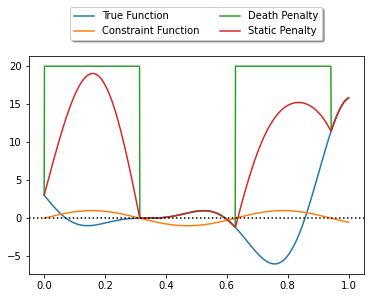

In [4]:
plt.figure()
plt.plot(x, yf, label="True Function")
plt.plot(x, yg, label="Constraint Function")
plt.plot(x, yd, label="Death Penalty")
plt.plot(x, ys, label="Static Penalty")
plt.axhline(cut_off, color="black", ls="dotted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=2, fancybox=True, shadow=True)

## Task 3.3

In [5]:
x_star_ind = np.argmin(yf)
print(x[x_star_ind], yf[x_star_ind])

0.7567567567567568 -6.020610973593629


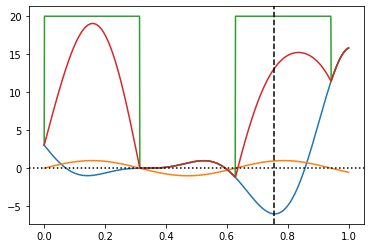

In [6]:
plt.figure()
plt.plot(x, yf)
plt.plot(x, yg)
plt.plot(x, yd)
plt.plot(x, ys)
plt.axhline(cut_off, color="black", ls="dotted")
plt.axvline(x[x_star_ind], color="black", ls="dashed")

## Task 3.4 / 3.5

From the Figure, it is clear that $x_g^*, x_d^*$ and $x_s^*$ are the same. 

In [7]:
xg_star_ind = np.argmin(yd)
print(x[xg_star_ind], yf[xg_star_ind])

0.6276276276276276 -1.1852241199178717


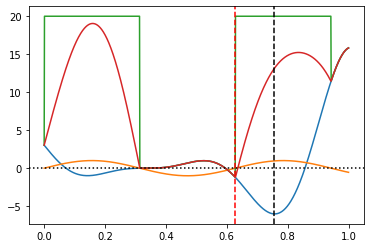

In [8]:
plt.figure()
plt.plot(x, yf)
plt.plot(x, yg)
plt.plot(x, yd)
plt.plot(x, ys)
plt.axhline(cut_off, color="black", ls="dotted")
plt.axvline(x[x_star_ind], color="black", ls="dashed")
plt.axvline(x[xg_star_ind], color="red", ls="dashed")

You should realise that imposing the constraint has changed the location of the minimum. 

## Task 3.6

In [9]:
def phi_static_prime(x, f, g, s, r=20, beta=1):
    return f(x) - s(x, g, r, beta)
ysp = np.array([phi_static_prime(i, f, g, s) for i in x])

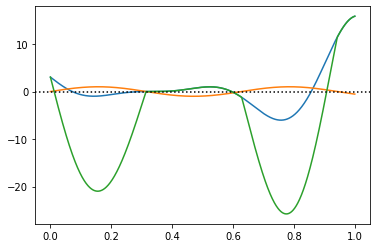

In [10]:
plt.figure()
plt.plot(x, yf)
plt.plot(x, yg)
plt.plot(x, ysp)
plt.axhline(cut_off, color="black", ls="dotted")

The implication is that this penalty term now mislead us if we are minimising as the location of the minimum clearly changes and goes into the infeasible space. 

However,this can be useful in case of maximising the function. As clearly the local maximum in the feasible regions remain unaltered this way. 

# Task 3.7

One way to tackle this would be to multiply $-1$ on both sides and transform the constraint to: $-g(x) = -sin(x) \leq 0$, and then use the standard forms of penalty functions. Plotting the function and performing appropriate analyses should reveal that the optimal solution has changed as the feasible space has changed. 

In [11]:
x = np.linspace(0,1,1000)
yf = f(x)
yg_n = neg_g(x)
yd_n = np.array([phi_death(i, f, neg_g) for i in x])
ys_n = np.array([phi_static(i, f, neg_g, s) for i in x])
cut_off = 0
# new optimal solution
xg_star_ind_n = np.argmin(yd_n)

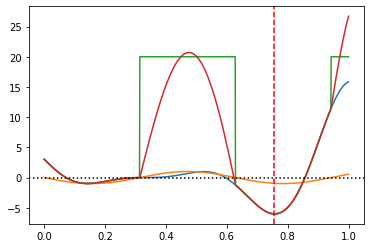

In [12]:
plt.figure()
plt.plot(x, yf)
plt.plot(x, yg_n)
plt.plot(x, yd_n)
plt.plot(x, ys_n)
plt.axhline(cut_off, color="black", ls="dotted")
plt.axvline(x[xg_star_ind_n], color="red", ls="dashed")